In [1]:
from sklearn import datasets

In [2]:
## Two ways of loading the data
# 1: as a numpy array
iris_data = datasets.load_iris()
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
# 2: as a pandas dataframe

iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                       columns= iris_data['feature_names'] + ['target'])
iris_df.head()

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


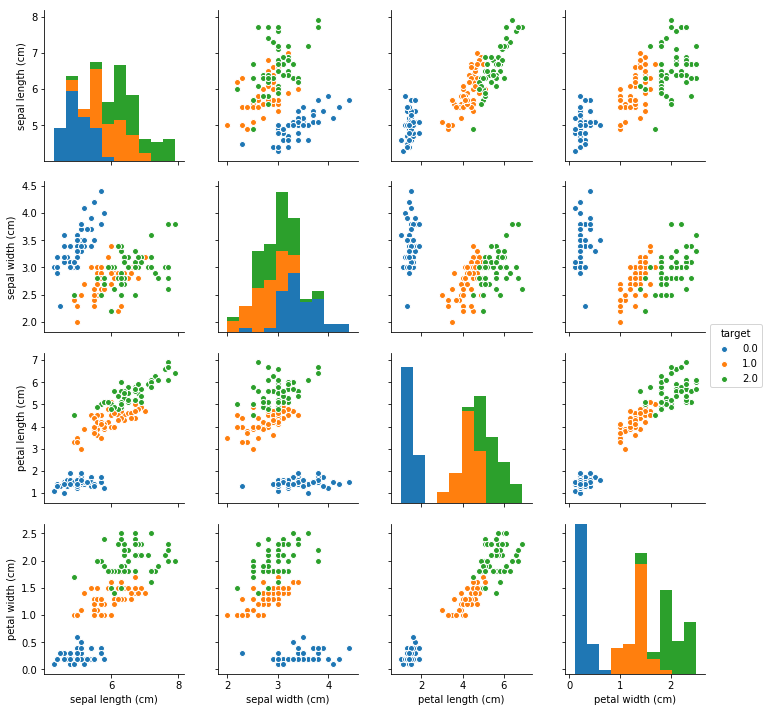

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns #; sns.set(style="ticks", color_codes=True)

sns.pairplot(iris_df, vars=iris_data['feature_names'], hue="target")
plt.show()

In [5]:
# The iris dataset


data = iris_data.data

##Same database with seaborn 
#iris_sns = sns.load_dataset("iris")
#sns.pairplot(iris_sns, hue='species')
#plt.show()

In [6]:
X0 = iris_data['data'][:,0] #sepal length in cm
X1 = iris_data['data'][:,1] #sepal width in cm
X2 = iris_data['data'][:,2] #petal length in cm
X3 = iris_data['data'][:,3] #petal width in cm

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import numpy as np
import pandas as pd

# Clustering with K-Means

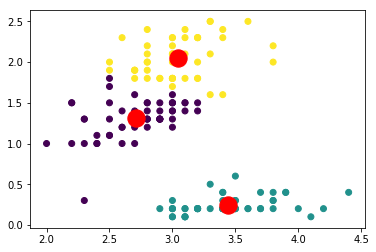

In [8]:
from sklearn.cluster import KMeans

X = iris_data['data'][:,(1,3)]  #length, width
Y = (iris_data['target'] == 2).astype(np.float64)

model = KMeans(n_clusters=3,
               #init='random', n_init=10, max_iter=300, tol=0.0001, 
              )
Y_pred = model.fit_predict(X)

fig = plt.figure()
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=Y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')

plt.show()

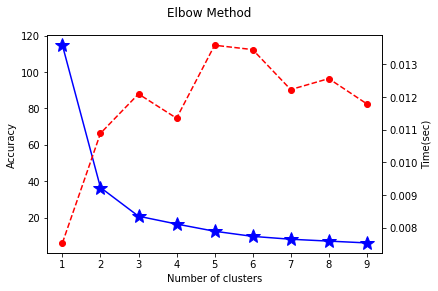

In [9]:
import time

clusters = range(1,10)
accuracy = []
time_list = []
for i in clusters:
    t0 = time.time()
    model = KMeans(n_clusters=i,init='random', n_init=10, max_iter=300, tol=0.0001 )
    model.fit(X)
    t1 = time.time()
    accuracy.append(model.inertia_)
    time_list.append(t1-t0)
    
fig = plt.figure()

ax = fig.add_subplot(111) 
ax.plot(clusters, accuracy, 'b*-', markersize=15)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of clusters')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Time(sec)')
ax2.plot(clusters, time_list, 'ro--')

fig.suptitle('Elbow Method')
plt.show()